In [1]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from glob import glob

In [2]:
pdb_file = "/Volumes/DATA/MSM_Zuckerman/chignolin/chig_pdb_166.pdb"

In [3]:
traj_files = sorted(glob("/Volumes/DATA/MSM_Zuckerman/chignolin/*.dcd"))

In [4]:
features = pyemma.coordinates.featurizer(pdb_file)
features.add_residue_mindist()
source = pyemma.coordinates.source([traj_files], features=features, chunk_size=10000)
X = source.get_output()

28-06-18 23:17:50 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[0] WARNING  Using all residue pairs with schemes like closest or closest-heavy is very time consuming. Consider reducing the residue pairs


<ipython-input-4-9a1506e8de43>:3: PyEMMA_DeprecationWarning: Passed deprecated argument "chunk_size", please use "chunksize"
  source = pyemma.coordinates.source([traj_files], features=features, chunk_size=10000)


HBox(children=(HBox(children=(Label(value='getting output of FragmentedTrajectoryReader'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=54), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [5]:
# top model is kinetic, tica lag 5 frames, 95% var. tics, 100 microstates, msm lag 50 frames

In [6]:
tica = pyemma.coordinates.tica(X, lag=5, var_cutoff=0.95, kinetic_map=True)

In [7]:
tica.ndim

15

In [9]:
Y = tica.get_output()

In [10]:
kmeans = pyemma.coordinates.cluster_kmeans(Y, k=100, max_iter=1000)

HBox(children=(HBox(children=(Label(value='initialize kmeans++ centers'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='kmeans iterations'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

20-06-18 21:43:52 pyemma.coordinates.clustering.kmeans.KmeansClustering[5] INFO     Cluster centers converged after 58 steps.


In [11]:
dtrajs = kmeans.dtrajs

In [12]:
np.save('chignolin_dtrajs_lag10ns', dtrajs)

In [2]:
dtrajs = list(np.load('chignolin_dtrajs_lag10ns.npy'))

In [1]:
pwd

'/Users/rafalpwiewiora/repos/msm-mfpt/vamp_scoring/automatic_eigenvalue/chignolin'

In [19]:
its = pyemma.msm.its(dtrajs, 2000, errors='bayes')

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=19), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

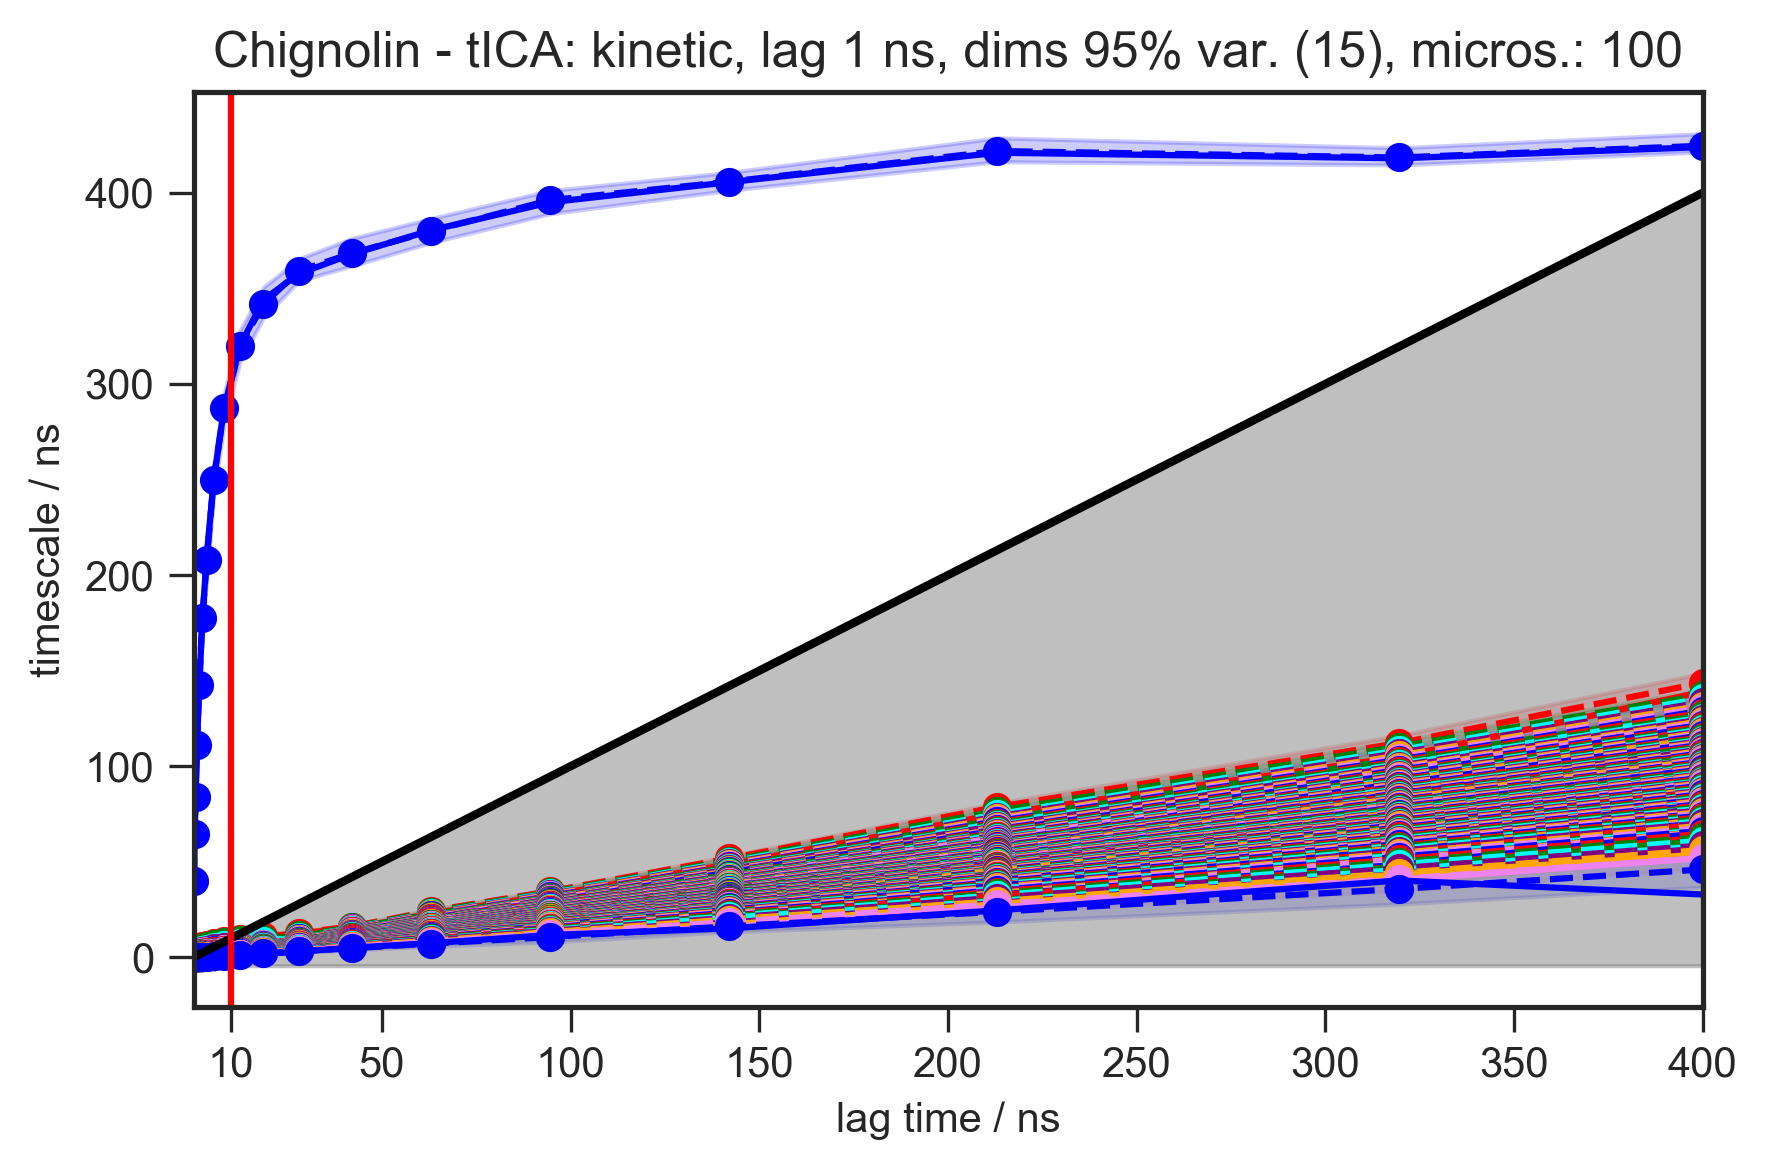

In [20]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, ylog=False, dt=0.2, units='ns')
plt.axvline(10, c='red')
plt.title('Chignolin - tICA: kinetic, lag 1 ns, dims 95% var. (15), micros.: 100')
plt.xticks([10,50,100,150,200,250,300,350,400])
plt.tight_layout()
plt.savefig('chignolin_its.png', dpi=300)
plt.savefig('chignolin_its.pdf')

In [113]:
# CK test

In [1]:
#bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 50)

In [3]:
#ck_test = bmsm.cktest(2, err_est=True)

In [4]:
# plt.figure()
# pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
# plt.tight_layout()
# plt.savefig('chignolin_cktest.png', dpi=300)
# plt.savefig('chignolin_cktest.pdf')

In [117]:
# how about 3 macrostates

In [5]:
# ck_test_3 = bmsm.cktest(3, err_est=True)

In [6]:
# plt.figure()
# pyemma.plots.plot_cktest(ck_test_3, units='ns', dt=0.2)
# plt.tight_layout()
# plt.savefig('chignolin_cktest_3macro.png', dpi=300)
# plt.savefig('chignolin_cktest_3macro.pdf')

In [120]:
# what if I did a longer lag time - 200 ns - 1000 frames

In [7]:
# bmsm_ = pyemma.msm.bayesian_markov_model(dtrajs, 1000)

In [8]:
# ck_test_ = bmsm_.cktest(2, err_est=True)

In [9]:
# plt.figure()
# pyemma.plots.plot_cktest(ck_test_, units='ns', dt=0.2)
# plt.tight_layout()
# plt.savefig('chignolin_cktest_lag200ns.png', dpi=300)
# plt.savefig('chignolin_cktest_lag200ns.pdf')

In [ ]:
# so now try lag times between 10 ns and 200 ns - what's the smallest at which we pass CK?

In [11]:
# UPDATE: a) all CK plots should go out to the same maximum for comparison, b) let's look at 10ns, 50 ns and then every
# 50 ns until the lag time used in the Noe models

In [ ]:
# lag 10 ns

In [21]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 50)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [22]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (200/10)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

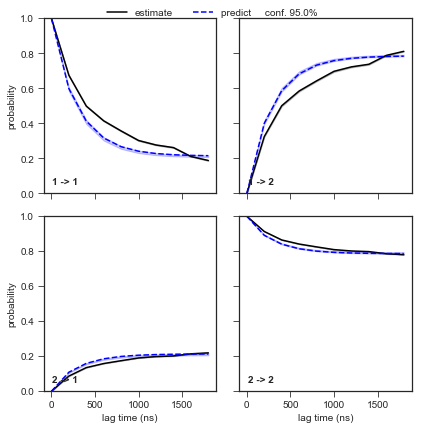

In [23]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag10ns_outto1800ns.png', dpi=300)
plt.savefig('chignolin_cktest_lag10ns_outto1800ns.pdf')

In [24]:
# lag 50 ns

In [25]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 250)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [26]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (200/50)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

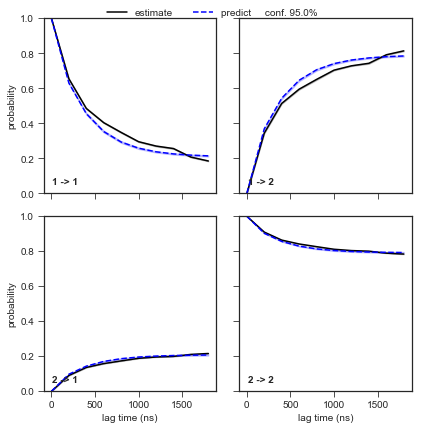

In [27]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag50ns_outto1800ns.png', dpi=300)
plt.savefig('chignolin_cktest_lag50ns_outto1800ns.pdf')

In [28]:
# lag 100 ns

In [29]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 500)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [30]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (200/100)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

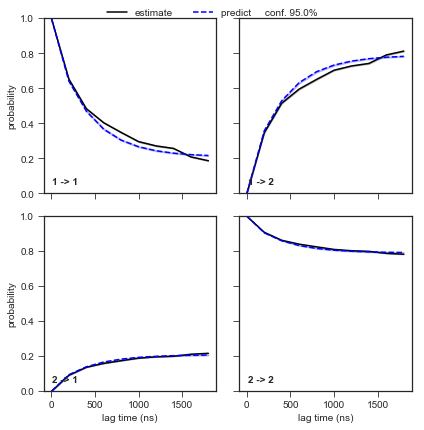

In [31]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag100ns_outto1800ns.png', dpi=300)
plt.savefig('chignolin_cktest_lag100ns_outto1800ns.pdf')

In [32]:
# lag 150 ns

In [33]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 750)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [34]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (200/150)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

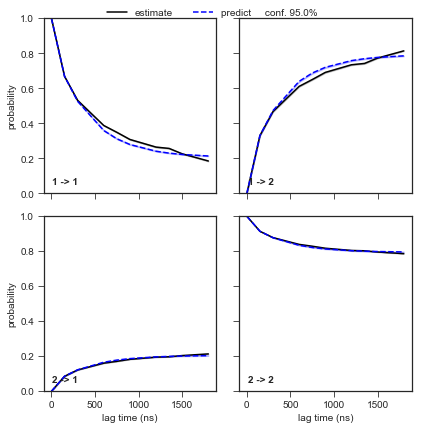

In [35]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag150ns_outto1800ns.png', dpi=300)
plt.savefig('chignolin_cktest_lag150ns_outto1800ns.pdf')

In [36]:
# lag 200 ns

In [37]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 1000)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [38]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (200/200)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

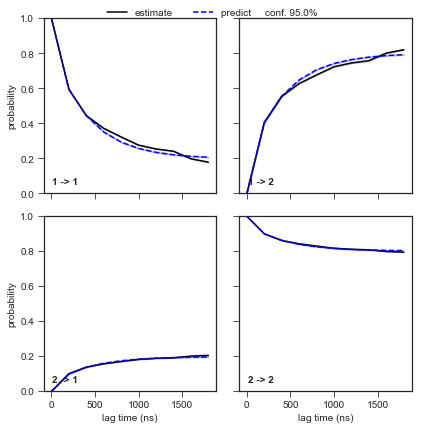

In [39]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag200ns_outto1800ns.png', dpi=300)
plt.savefig('chignolin_cktest_lag200ns_outto1800ns.pdf')

In [1]:
# let's also look at top model when scoring with only 2 eigenvalues

In [2]:
# top model is commute, tica lag 5 frames, 95% content (21 tICs), 1000 microstates, msm lag 50 frames

In [7]:
tica = pyemma.coordinates.tica(X, lag=5, dim=21, kinetic_map=False, commute_map=True)

In [8]:
Y = tica.get_output()

In [11]:
kmeans = pyemma.coordinates.cluster_kmeans(Y, k=1000, max_iter=1000)

HBox(children=(HBox(children=(Label(value='initialize kmeans++ centers'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='kmeans iterations'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

25-06-18 20:43:27 pyemma.coordinates.clustering.kmeans.KmeansClustering[9] INFO     Cluster centers converged after 3 steps.


In [12]:
dtrajs = kmeans.dtrajs

In [13]:
np.save('chignolin_dtrajs_lag10ns_2eigen', dtrajs)

In [8]:
dtrajs = list(np.load('chignolin_dtrajs_lag10ns_2eigen.npy'))

In [44]:
its_2eigen = pyemma.msm.its(dtrajs, 2000, errors='bayes', n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=19), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

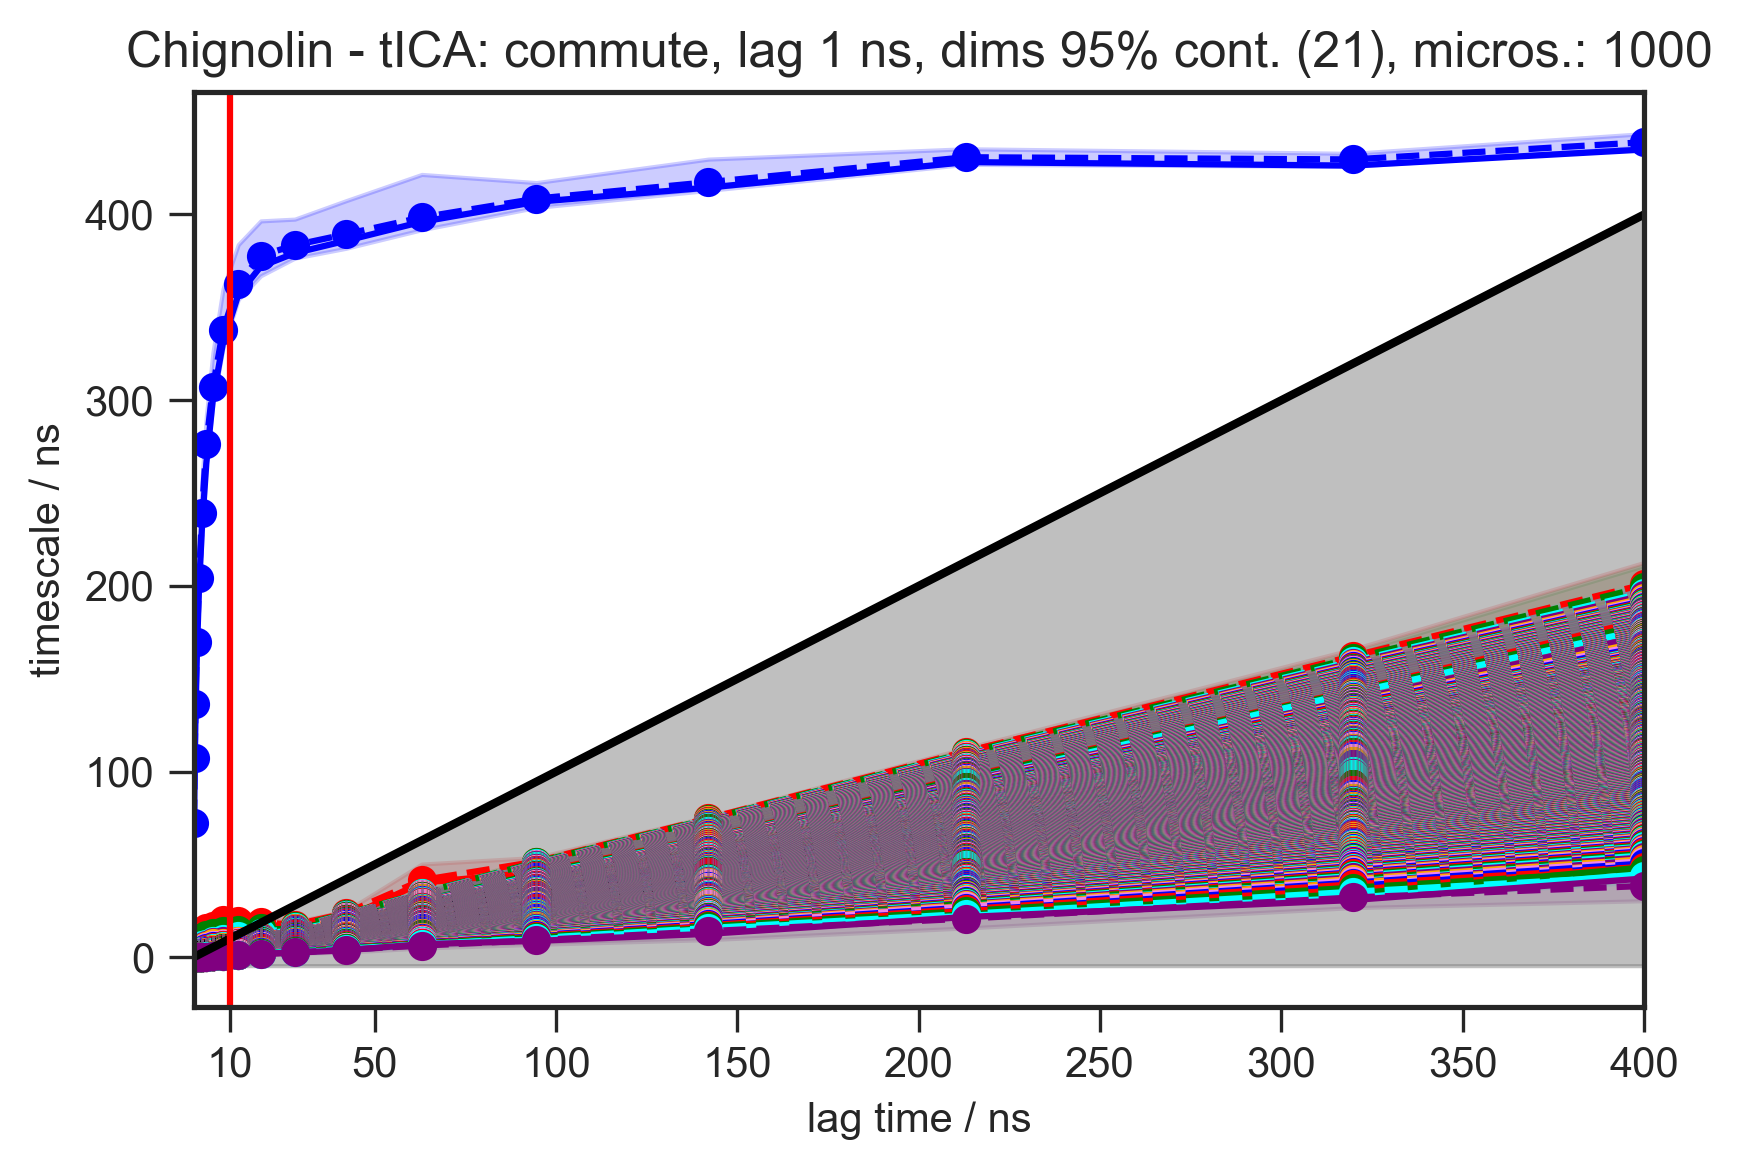

In [16]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its_2eigen, ylog=False, dt=0.2, units='ns')
plt.axvline(10, c='red')
plt.title('Chignolin - tICA: commute, lag 1 ns, dims 95% cont. (21), micros.: 1000')
plt.xticks([10,50,100,150,200,250,300,350,400])
plt.tight_layout()
plt.savefig('chignolin_its_10ns_2eigen.png', dpi=300)
plt.savefig('chignolin_its_10ns_2eigen.pdf')

In [46]:
import numpy as _np
from pyemma.util.types import  is_iterable_of_int as _is_iterable_of_int, is_int as _is_int

def plot_implied_timescales(ITS, ax=None, outfile=None, show_mle=True, show_mean=True,
                            xlog=False, ylog=True, confidence=0.95, refs=None, nits=-1,
                            process=None, units='steps', dt=1., colors = ['blue'], **kwargs):
    r"""Implied timescale plot
    Parameters
    ----------
    ITS : implied timescales object.
        Object whose data will be plotted. Must provide the functions: get_timescales() and get_timescales(i) where i is the
        the property samples_available
    ax : matplotlib Axes object, optional, default = None
        the axes to plot to. When set to None the default Axes object will be used.
    outfile : str, optional, default = None
        output file to write the figure to. When not given, the plot will be displayed
    show_mean : bool, default = True
        Line for mean value will be shown, if available
    show_mle : bool, default = True
        Line for maximum likelihood estimate will be shown
    xlog : bool, optional, default = False
        Iff true, the x-Axis is logarithmized
    ylog : bool, optional, default = True
        Iff true, the y-Axis is logarithmized
    confidence : float, optional, default = 0.95
        The confidence interval for plotting error bars (if available)
    refs : ndarray((m), dtype=float), optional, default = None
        Reference (exact solution or other reference) timescales if known. The number of timescales must match those
        in the ITS object
    nits: integer, default = -1
        Number of implied timescales to be shown. The default behaviour (-1) is to show all timescales available.
        :py:obj:`nits` != -1 and :py:obj:`process` != None are mutually exclusive
    process : iterable of integers, default is None
        list or ndarray((m), dtype=int) containing a list of the processes to be shown. The default behaviour is
        to show all timescales available.
        :py:obj:`process` != None and :py:obj:`nits` != -1 are mutually exclusive
    units: str or list (len=2) of strings, optional, default = 'steps'
        Affects the labeling of the axes. Used with :py:obj:`dt`, allows for changing the physical units of the axes.
        Accepts simple LaTeX math strings, eg. '$\mu$s'
        If this parameter is a list, it will be assumed that units[0] is for the x-axis and units[1] for the y-axis.
    dt: float or list(len=2) of floats, optional, default = 1.0
        Physical time between frames, expressed the units given in :py:obj:`units`. E.g, if you know that each
        frame corresponds to .010 ns, you can use the combination of parameters :py:obj:`dt` =0.01,
        :py:obj:`units` ='ns' to display the implied timescales in ns (instead of frames)
        If this parameter is a list, it will be assumed that dt[0] is for the x-axis and dt[1] for the y-axis.
    **kwargs: Will be passed to pyplot.plot when plotting the MLE datapoints (not the bootstrapped means).
            See the doc of pyplot for more options. Most useful lineproperties like `marker='o'` and/or :markersize=5
    Returns
    -------
    ax : Axes object containing the plot
    """
    import matplotlib.pyplot as _plt
    # check input
    if ax is None:
        ax = _plt.gca()
    #colors = ['blue', 'red', 'green', 'cyan', 'purple', 'orange', 'violet']
    lags = ITS.lagtimes
    xmax = _np.max(lags)
    srt = _np.argsort(lags)
    # Check the processes to be shown
    if process is not None:
        if nits != -1:
            raise TypeError(
                'optional arguments nits and process are mutually exclusive:', nits, process)
        if not _is_iterable_of_int(process):
            raise ValueError('process has to be an iterable of integers')
        if _np.max(process)+1 > ITS.number_of_timescales:
            raise ValueError(
                'requested process %u, whereas ITS only contains %u timescales' % (
                    _np.max(process), ITS.number_of_timescales))
        # Now that it's for sure that nits==-1, process is iter_of_ints, and the requested processes exist in its object:
        its_idx = process
    else:
        if not _is_int(nits):
            raise TypeError('nits is not an integer, ',nits)
        if nits == -1:
            nits = ITS.number_of_timescales
        its_idx = _np.arange(ITS.number_of_timescales)[:nits]
    # Check units and dt for user error.
    if isinstance(units, list) and len(units) != 2:
        raise TypeError("If units is a list, len(units) has to be = 2")
    if isinstance(dt, list) and len(dt) != 2:
        raise TypeError("If dt is a list, len(dt) has to be = 2")
    # Create list of units and dts for different axis
    if isinstance(units, str):
        units = [units] * 2
    if isinstance(dt, (float, int)):
        dt = [dt] * 2
    #ymin = min(_np.min(lags), _np.min(ITS.get_timescales()))
    #ymax = 1.5*_np.min(ITS.get_timescales())
    for i in its_idx:
        # plot estimate
        if show_mle:
            ax.plot(
                lags[srt] * dt[0], ITS.get_timescales(process=i)[srt] * dt[1],
                color=colors[i % len(colors)], **kwargs)
        # sample available?
        if ITS.samples_available:# and ITS.sample_number_of_timescales > i):
            # plot sample mean
            if show_mean:
                ax.plot(
                    lags[srt] * dt[0], ITS.get_sample_mean(process=i)[srt] * dt[1], marker='o',
                    color=colors[i % len(colors)], linestyle='dashed')
            (lconf, rconf) = ITS.get_sample_conf(confidence, i)
            ax.fill_between(
                lags[srt] * dt[0], lconf[srt] * dt[1], rconf[srt] * dt[1],
                alpha=0.2, color=colors[i % len(colors)])
        # reference available?
        if refs is not None:
            tref = refs[i] * dt[1]
            ax.plot([0, min(tref, xmax) * dt[0]], [tref, tref], color='black', linewidth=1)
    # cutoff
    ax.plot(lags[srt] * dt[0], lags[srt] * dt[1], linewidth=2, color='black')
    ax.set_xlim([1.0 * dt[0], xmax * dt[0]])
    #ax.set_ylim([ymin,ymax])
    ax.fill_between(
        lags[srt] * dt[0], ax.get_ylim()[0]*_np.ones(len(lags))*dt[1], lags[srt] * dt[1],
        alpha=0.5, color='grey')
    # formatting
    ax.set_xlabel('lag time / %s' % units[0])
    ax.set_ylabel('timescale / %s' % units[1])
    if (xlog):
        ax.set_xscale('log')
    if (ylog):
        ax.set_yscale('log')
    # show or save
    # if outfile is None:
    #    _plt.show()
    if outfile is not None:
        _plt.savefig(outfile)
    return ax

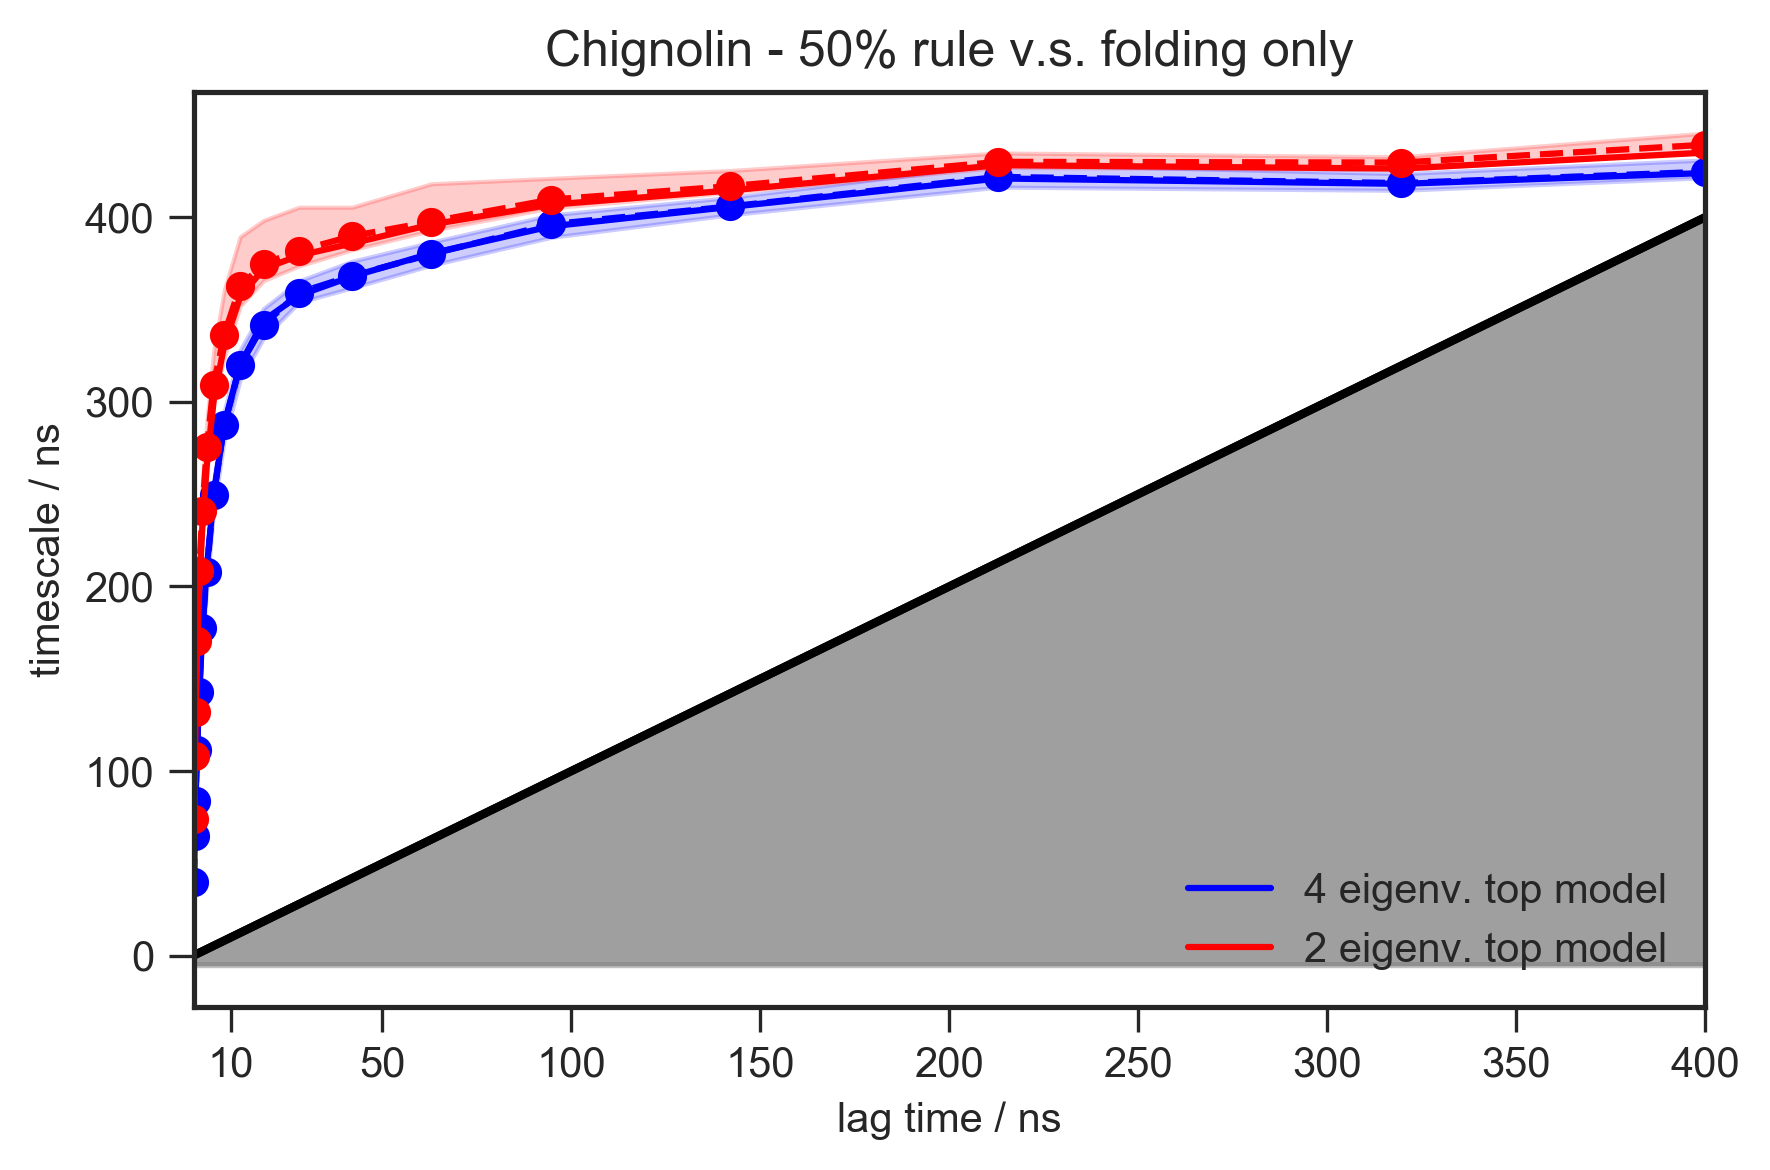

In [48]:
plt.figure(dpi=300)
plot_implied_timescales(its, ylog=False, dt=0.2, units='ns', nits=1, show_mean=True, label='4 eigenv. top model')
plot_implied_timescales(its_2eigen, ylog=False, dt=0.2, units='ns', nits=1, colors=['red'], show_mean=True, label='2 eigenv. top model')
plt.legend()
#plt.axvline(10, c='red')
plt.title('Chignolin - 50% rule v.s. folding only')
plt.xticks([10,50,100,150,200,250,300,350,400])
plt.tight_layout()
plt.savefig('chignolin_its_diffeigen.png', dpi=300)
plt.savefig('chignolin_its_diffeigen.pdf')

In [49]:
# now CK-test on 2 eigen

In [50]:
# lag 10 ns

In [11]:
bmsm = pyemma.msm.estimate_markov_model(dtrajs, 50)

In [12]:
ck_test = bmsm.cktest(2, err_est=False, mlags=(np.arange(10) * (200/10)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

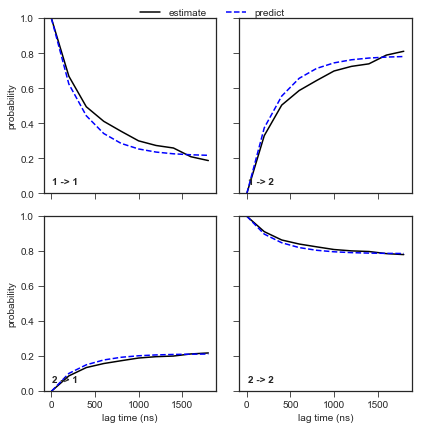

In [13]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag10ns_outto1800ns_2eigen.png', dpi=300)
plt.savefig('chignolin_cktest_lag10ns_outto1800ns_2eigen.pdf')

In [14]:
# lag 50 ns

In [15]:
bmsm = pyemma.msm.estimate_markov_model(dtrajs, 250)

In [16]:
ck_test = bmsm.cktest(2, err_est=False, mlags=(np.arange(10) * (200/50)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

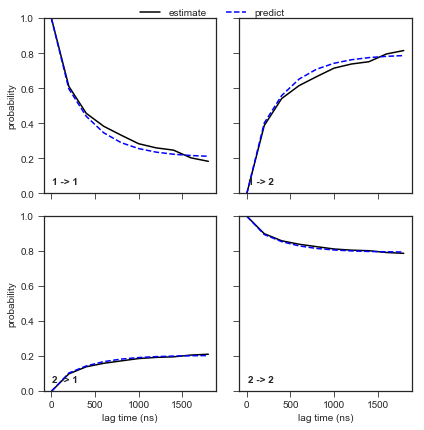

In [17]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag50ns_outto1800ns_2eigen.png', dpi=300)
plt.savefig('chignolin_cktest_lag50ns_outto1800ns_2eigen.pdf')

In [18]:
# lag 100 ns

In [19]:
bmsm = pyemma.msm.estimate_markov_model(dtrajs, 500)

In [20]:
ck_test = bmsm.cktest(2, err_est=False, mlags=(np.arange(10) * (200/100)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

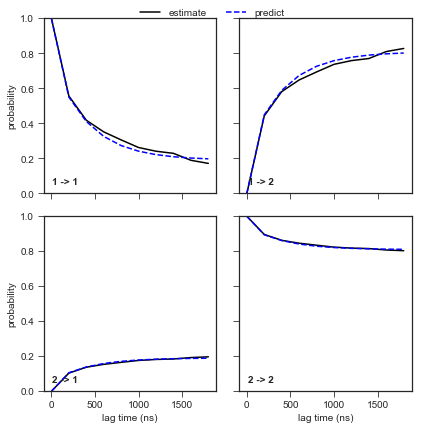

In [21]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag100ns_outto1800ns_2eigen.png', dpi=300)
plt.savefig('chignolin_cktest_lag100ns_outto1800ns_2eigen.pdf')

In [22]:
bmsm = pyemma.msm.estimate_markov_model(dtrajs, 750)

In [23]:
ck_test = bmsm.cktest(2, err_est=False, mlags=(np.arange(10) * (200/150)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

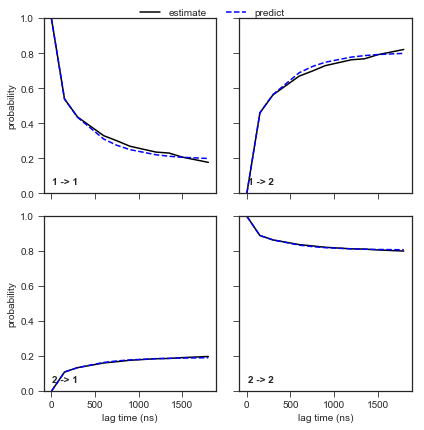

In [24]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag150ns_outto1800ns_2eigen.png', dpi=300)
plt.savefig('chignolin_cktest_lag150ns_outto1800ns_2eigen.pdf')

In [ ]:
# lag 200 ns

In [25]:
bmsm = pyemma.msm.estimate_markov_model(dtrajs, 1000)

In [26]:
ck_test = bmsm.cktest(2, err_est=False, mlags=(np.arange(10) * (200/200)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

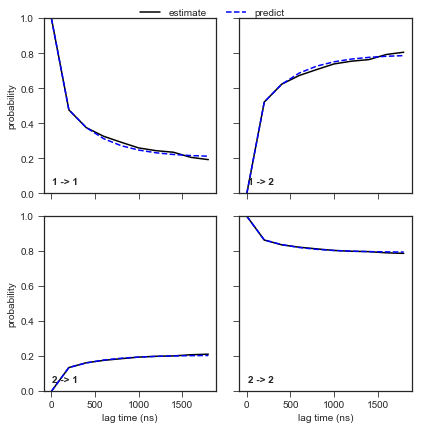

In [27]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag200ns_outto1800ns_2eigen.png', dpi=300)
plt.savefig('chignolin_cktest_lag200ns_outto1800ns_2eigen.pdf')

In [49]:
#######################
# assign microstates to folded and unfolded based on PCCA 2 macrostates
# let's look at lag time at which CK-test is first passed

In [4]:
# # code from below aggregated here for easy copying
# import pyemma
# import matplotlib
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('ticks')
# import numpy as np
# from glob import glob

# dtrajs = list(np.load('chignolin_dtrajs_lag10ns.npy'))

# # 100 ns -- change
# bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 500)
# pcca = bmsm.pcca(2)
# pcca.coarse_grained_stationary_probability

# # 0 is unfolded, 1 is folded
# bmsm.metastable_sets
# meta_sets = bmsm.metastable_sets

# np.save('chignolin_lag100ns_metastable_sets', bmsm.metastable_sets)

# meta_membs = bmsm.metastable_memberships

# np.save('chignolin_lag100ns_metastable_memberships', bmsm.metastable_memberships)

In [3]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from glob import glob

In [4]:
dtrajs = list(np.load('chignolin_dtrajs_lag10ns.npy'))

In [56]:
# 100 ns

In [6]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 500)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [7]:
pcca = bmsm.pcca(2)

In [16]:
pcca.coarse_grained_stationary_probability

array([ 0.20908828,  0.79091172])

In [17]:
# 0 is unfolded, 1 is folded

In [8]:
bmsm.metastable_sets

[array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 13, 14, 15, 16, 17, 18, 19,
        20, 22, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 40, 45, 46,
        47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 66, 67,
        68, 69, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 86, 87, 89, 90, 91,
        92, 93, 94, 95, 96, 97, 98, 99]),
 array([ 0,  8, 12, 21, 23, 24, 31, 35, 39, 41, 42, 43, 44, 52, 55, 64, 65,
        70, 71, 72, 78, 84, 85, 88])]

In [35]:
meta_sets = bmsm.metastable_sets

In [9]:
np.save('chignolin_lag100ns_metastable_sets', bmsm.metastable_sets)

In [10]:
meta_membs = bmsm.metastable_memberships

In [11]:
np.save('chignolin_lag100ns_metastable_memberships', bmsm.metastable_memberships)

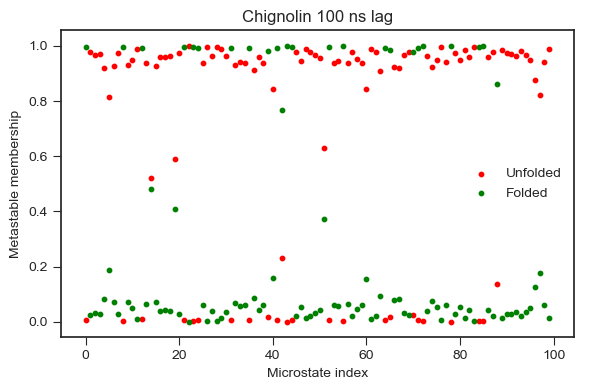

In [31]:
plt.figure(dpi=100)
plt.scatter(range(100), meta_membs[:,0], color='red', s=10, label='Unfolded')
plt.scatter(range(100), meta_membs[:,1], color='green', s=10, label='Folded')
plt.xlabel('Microstate index')
plt.ylabel('Metastable membership')
plt.title('Chignolin 100 ns lag')
plt.legend()
plt.tight_layout()
plt.savefig('chignolin_lag100ns_metastable_membs.png', dpi=300)
plt.show()

In [47]:
# confirm identity of the states by looking at trajectory

In [36]:
dtrajs_macro = []

for state in dtrajs[0]:
    if state in meta_sets[0]:
        dtrajs_macro.append(0)
    elif state in meta_sets[1]:
        dtrajs_macro.append(1)

In [39]:
len(dtrajs_macro)

534743

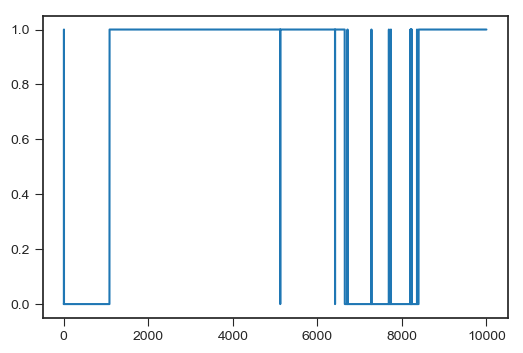

In [50]:
plt.figure(dpi=100)
plt.plot(dtrajs_macro[:10000])
plt.show()

In [49]:
# indeed 0 is unfolded and 1 is folded

In [51]:
##########

In [52]:
########## 

In [68]:
# meta_membs_diff = []

# for state in bmsm.metastable_memberships:
#     meta_membs_diff.append(np.abs(state[0]-state[1]))
    
# meta_membs_diff_belowp8 = []

# for i in range(len(meta_membs_diff)):
#     if meta_membs_diff[i] < 0.8:
#         meta_membs_diff_belowp8.append(i)

In [12]:
# plt.figure()
# plt.plot(meta_membs_diff)
# plt.xticks(meta_membs_diff_belowp8, rotation=90)
# plt.xlabel('Microstate index')
# plt.ylabel('abs(folded - unfolded) metastable membership')
# plt.title('Chignolin')
# plt.axhline(0.8, color='red')
# plt.tight_layout()
# plt.savefig('chignolin_lag100ns_metastable_memberships.png', dpi=300)
# plt.show()

In [85]:
# so let's make 2 state trajectories to compare to RMSD

In [18]:
# dtrajs_macro = []

# for state in dtrajs[0]:
#     if state in meta_sets[0]:
#         dtrajs_macro.append(0)
#     elif state in meta_sets[1]:
#         dtrajs_macro.append(1)

In [19]:
# len(dtrajs[0])

In [20]:
# len(dtrajs_macro)

In [21]:
# plt.figure(dpi=100)
# plt.scatter(range(len(dtrajs_macro)), dtrajs_macro, s=1)
# plt.show()

In [22]:
# rmsd = np.load('chignolin_rmsd.npy')[0]

In [23]:
# plt.figure(dpi=100)
# plt.scatter(range(len(rmsd)), rmsd, s=1)
# plt.show()

In [203]:
# take everything over 0.2 as unfolded - make rmsd_macro_dtrajs

In [24]:
# rmsd_macro_dtrajs = []

# for rmsd_ in np.concatenate(rmsd):
#     if rmsd_ > 0.2:
#         rmsd_macro_dtrajs.append(0)
#     else:
#         rmsd_macro_dtrajs.append(1)

In [25]:
# np.corrcoef(dtrajs_macro, rmsd_macro_dtrajs)

In [4]:
############

In [5]:
# final PAPER CK-tests - at lag time 150 ns - take them out to 5 x the top timescale - 2039.5 ns - 14x lag time

In [10]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 150*5)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [11]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(15)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=14), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

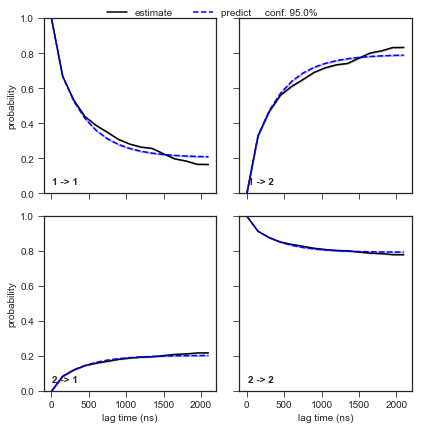

In [12]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag150ns_outto5xtoptimescale.png', dpi=300)
plt.savefig('chignolin_cktest_lag150ns_outto5xtoptimescale.pdf')

In [3]:
# with problems in villin and Trp-cage, we're now doing 15x top timescale

In [4]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 150*5)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [5]:
14*3

42

In [8]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(0,43)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=42), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

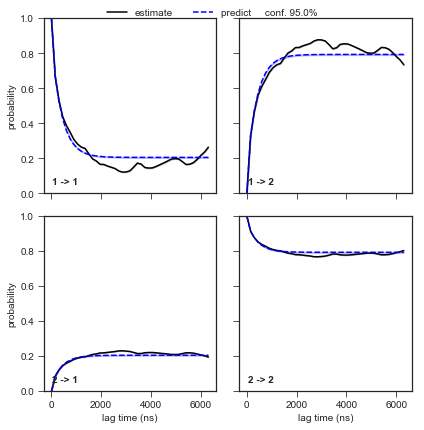

In [9]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag150ns_outto15xtoptimescale.png', dpi=300)
plt.savefig('chignolin_cktest_lag150ns_outto15xtoptimescale.pdf')

In [3]:
# doing PCCA again at lag times we end up using in the paper

In [5]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from glob import glob

dtrajs = list(np.load('chignolin_dtrajs_lag10ns.npy'))

# 150 ns
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 750)
pcca = bmsm.pcca(2)
pcca.coarse_grained_stationary_probability

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

array([ 0.20584945,  0.79415055])

In [6]:
# 0 is unfolded, 1 is folded
bmsm.metastable_sets

[array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 13, 14, 15, 16, 17, 18, 19,
        20, 22, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 40, 45, 46,
        47, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 66, 67,
        68, 69, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 86, 87, 89, 90, 91,
        92, 93, 94, 95, 96, 97, 98, 99]),
 array([ 0,  8, 12, 21, 23, 24, 31, 35, 39, 41, 42, 43, 44, 52, 55, 64, 65,
        70, 71, 72, 78, 84, 85, 88])]

In [7]:
meta_sets = bmsm.metastable_sets

np.save('chignolin_lag150ns_metastable_sets', bmsm.metastable_sets)

meta_membs = bmsm.metastable_memberships

np.save('chignolin_lag150ns_metastable_memberships', bmsm.metastable_memberships)